<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Social Media Prediction Kaggle Project Part 2/2: Profile Image Processing </h3></center> 
<center><h3> </h3></center> 
<center><h3>Team Name: Social-Dilemma</h3></center> 

## Inspecting Profile Image Data


[Social Media Prediction ](https://www.kaggle.com/c/ift6758-a20/data)

***Data Description***

The files provided are described here.

Overall there is a csv file each for the training and test. Additionally, a set of profile images are provided each for train and test.

***File descriptions***

    train.csv - the training set
    profile_images_train.zip - profile images of users specified in the training set (`Profile Image` field)
    test.csv - the test set which has the same structure as the train set except for the field that needs to be predicted (Number of Profile Likes)
    profile_images_test.zip - profile images of users specified in the test set (`Profile Image` field)
    sample_submission.csv - a sample submission file in the correct format with random values for predictions

*** Image Data fields**

    Id - Anonymous unique alphanumeric id for each user
    
    Profile Image - The filename of the PNG image corresponding to the user's profile image used in the simulation. These filenames point to the image file name in the train_profile_images.zip and test_profile_images.zip files.
    Num of Profile Likes - The number of profile 'likes' received by the user from visitors/followers 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#### Download the dataset files

#### Load the data into DataFrames

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


#### Drop columns

In [4]:
toDrop = ['Id','User Name', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color','Location']
df_clean = df_train.drop(toDrop,axis=1)

In [5]:
df_clean.shape

(7500, 18)

Checking for Profile Image field NaN values 

In [6]:
# The Profile Image field does not containe any Null Values
df_clean.isnull().sum()

Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Category                                  0
Avg Daily Profile Visit Duration in seconds      77
Avg Daily Profile Clicks                         76
Profile Image                                     0
Num of Profile Likes                              0
dtype: int64

#**Preprocessing of Images**

In [7]:
from google.colab import files
files.upload() #upload kaggle.json


KeyboardInterrupt: ignored

In [1]:
#create folder
!mkdir /content/ift6758-a20


mkdir: cannot create directory ‘/content/ift6758-a20’: File exists


In [8]:
# copy files
!unzip /content/ift6758-a20.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_profile_images/profile_images_train/9O6PO4HFOCQ99IHF.png  
  inflating: train_profile_images/profile_images_train/9OGBOKM836P9MHMF.png  
  inflating: train_profile_images/profile_images_train/9OI7OC6A872QJPSH.png  
  inflating: train_profile_images/profile_images_train/9OI8I76J9K28EKQH.png  
  inflating: train_profile_images/profile_images_train/9OPJABRP2617QS4D.png  
  inflating: train_profile_images/profile_images_train/9OT5062HK84PG4N3.png  
  inflating: train_profile_images/profile_images_train/9P0LPSH2KE7K544O.png  
  inflating: train_profile_images/profile_images_train/9P0NH81RQ8CH2ML4.png  
  inflating: train_profile_images/profile_images_train/9P38G80NSFA7KDK6.png  
  inflating: train_profile_images/profile_images_train/9P4FRH3ICREEQL1D.png  
  inflating: train_profile_images/profile_images_train/9PAC0AE37SGQATON.png  
  inflating: train_profile_images/profile_images_train/9PFJD24I7OT7LRS0.png  
  inflating: 

In [9]:
!cp -r /content/test_profile_images /content/ift6758-a20
!cp -r /content/train_profile_images /content/ift6758-a20
!cp -r /content/test.csv /content/ift6758-a20
!cp -r /content/train.csv /content/ift6758-a20

In [10]:
!ls /content/ift6758-a20

test.csv  test_profile_images  train.csv  train_profile_images


In [11]:
import pandas as pd

df_train = pd.read_csv("/content/ift6758-a20/train.csv")
df_test = pd.read_csv("/content/ift6758-a20/test.csv") 

In [12]:
import glob
import cv2

c= df_train['Profile Image']
t=df_test['Profile Image']

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list

pathtr = glob.glob("/content/ift6758-a20/train_profile_images/profile_images_train/*.png") #or jpg
pathte = glob.glob("/content/ift6758-a20/test_profile_images/profile_images_test/*.png") #or jpg
list_ = []#train set
list_t = []# test set

# for training set
for j in range(0,len(c)):
   cv_image = [read_img(list_, c[j])]

#for test set
for l in range(0,len(t)):
   cv_image_t = [read_img(list_t, t[l])]


In [13]:
from keras.preprocessing.image import load_img
from skimage.feature import hog

fd=[]
fdtest=[]
# training set
for i in range(0,len(pathtr)):
   img = load_img(pathtr[i])
   fd.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))
# for test set
for m in range(0,len(pathte)):
   img = load_img(pathte[m])
   fdtest.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))  

In [14]:

from sklearn.decomposition import PCA

for n in np.arange(25):
  pca = PCA(n_components=n).fit(fd)
  exp_vars = pca.explained_variance_ratio_
  total_exp_var = exp_vars.sum()

  if total_exp_var >= 0.85:
    break

print('Number of components required for 85% explained variance = ',n)

Number of components required for 85% explained variance =  24


In [16]:
pca = PCA(n_components=24)
pca.fit(fd)
print('Component-wise Variance explained = ',pca.explained_variance_ratio_)
print('         Total Variance explained = ',pca.explained_variance_ratio_.sum())

Component-wise Variance explained =  [0.14274545 0.09578483 0.06263867 0.04995256 0.04363702 0.03869778
 0.03453125 0.03200939 0.03091681 0.02520111 0.02448223 0.0230004
 0.02241001 0.02013822 0.01939948 0.01855348 0.01769073 0.01635676
 0.0152703  0.01439801 0.01322758 0.01300499 0.01248677 0.01201647]
         Total Variance explained =  0.7985502866773351


In [ ]:
X_r = pca.transform(fd)
X_r_t = pca.transform(fdtest)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X_r)
cluster_labels = kmeans.labels_
print(cluster_labels)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=cluster_labels, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means Clusters (k=10) on PCA (n=2) Digits dataset')

plt.plot();

In [ ]:
Imageclusters = kmeans.labels_
df = pd.DataFrame(Imageclusters,columns=['Clusters'])


In [ ]:
dft = pd.DataFrame(kmeans.predict(X_r_t),columns=['Clusters'])


In [ ]:
df_cleaned = df_train

In [ ]:
import seaborn as sns

# Relation of Profile Category with Num of Profile Likes
sns.barplot(x=df['Clusters'], y=df_cleaned['Num of Profile Likes']);

# **FACE RECOGNITION**

In [17]:
# Install DeepFace, a deep learning face and facial attribute analysys (age, gender, emotion and race) framework created at Facebook research
!pip install deepface
# Install PyPAC library for proxy auto-config (PAC) files and HTTP requests
!pip install pypac

     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 2.3MB 10.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9693 sha256=2da9c1b3edc73830e79b9d349c89973e41102284b0d9f2ec1f8d55eb4993e71a
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
     |████████████████████████████████| 409kB 12.7MB/s 
     |████████████████████████████████| 1.9MB 19.2MB/s 


In [ ]:
!wget https://files.fast.ai/models/vgg16_bn.h5

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


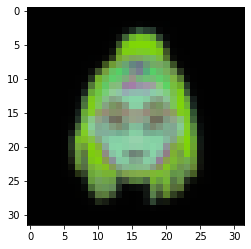

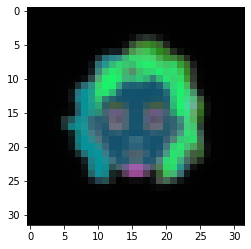

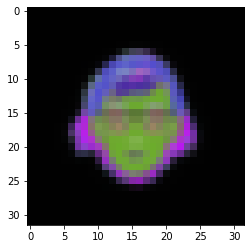

In [18]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

img1_path = "/content/train_profile_images/profile_images_train/001MIONMBAF4B471.png"
img2_path = "/content/train_profile_images/profile_images_train/0036F0G73EE1ID1F.png"
img3_path = "/content/train_profile_images/profile_images_train/00AF01A3HI20S28J.png"


img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
img3 = cv2.imread(img3_path)

plt.imshow(img1[:, :, ::-1])
plt.show()
plt.imshow(img2[:, :, ::-1])
plt.show()
plt.imshow(img3[:, :, ::-1])
plt.show()

In [19]:
# Extract gender and emotion from the image provided on img1_path
result_gender_emotion = DeepFace.analyze(img1_path, enforce_detection="True", actions = ['gender', 'emotion'])
result_gender_emotion

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 114MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:02, 190MB/s]
Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

Action: emotion:  50%|█████     | 1/2 [00:08<00:08,  8.06s/it]

Action: emotion: 100%|██████████| 2/2 [00:08<00:00,  4.16s/it]


{'dominant_emotion': 'happy',
 'emotion': {'angry': 0.162802345585078,
  'disgust': 2.7663029200653e-06,
  'fear': 21.473553776741028,
  'happy': 34.099969267845154,
  'neutral': 0.0008572717888455372,
  'sad': 11.508221179246902,
  'surprise': 32.75459408760071},
 'gender': 'Man'}

# Edge Detection

In [21]:
import os

!mkdir /content/modified_images/

#path_to_img = '/content/test_profile_images/profile_images_test/01D40L6DEB1N33TT.png'
algo_edgedetect = ['sobel', 'prewitt','canny','roberts','scharr']

def edgeDetector(img_path,algo_edgedetect=None):
    img = cv2.imread(img_path)
    if algo_edgedetect == 'canny':
        img_edge = cv2.Canny(img,100,200)
    if algo_edgedetect == 'sobel':
        img_edge = cv2.Sobel(img,-1,1,0,ksize=-1)
    if algo_edgedetect == 'prewitt':
        prewitt_kernel_h = np.array([[1,1,1],
                                    [0,0,0],
                                    [-1,-1,-1]])
        prewitt_kernel_v = np.array([[-1,0,1],
                                    [-1,0,1],
                                    [-1,0,1]])
        prewitt_h = cv2.filter2D(img,-1,prewitt_kernel_h)
        prewitt_v = cv2.filter2D(img,-1,prewitt_kernel_v)
        img_edge = prewitt_h + prewitt_v
    if algo_edgedetect == 'roberts':
        roberts_kernel_h = np.array([[-1,0],[0,1]])
        roberts_kernel_v = np.array([[0,-1],[1,0]])
        roberts_h_ele = cv2.filter2D(img,-1,roberts_kernel_h)
        roberts_v_ele = cv2.filter2D(img,-1,roberts_kernel_v)
        img_edge = roberts_h_ele + roberts_v_ele
    if algo_edgedetect == 'scharr':
        # img_gaussian = cv2.GaussianBlur(img,(3,3),5)
        # img_edge = cv2.Laplacian(img_gaussian,-1)
        img_edge = cv2.Scharr(img,-1,1,0)

    # print(img_edge.dtype0
    #plt.figure(figsize=(10,10))
    #plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    #plt.subplot(122),plt.imshow(img_edge),plt.title('Output',color='c')
    #plt.show()
    return img_edge


img_canny = edgeDetector(img3_path,algo_edgedetect='canny')
cv2.imwrite("/content/modified_images/img_canny.png", img_canny);          
img_sobel = edgeDetector(img3_path,algo_edgedetect='sobel')
cv2.imwrite("/content/modified_images/img_sobel.png", img_sobel);
img_prewitt = edgeDetector(img3_path,algo_edgedetect='roberts')
cv2.imwrite("/content/modified_images/img_prewitt.png", img_prewitt);
img_roberts = edgeDetector(img3_path,algo_edgedetect='prewitt')
cv2.imwrite("/content/modified_images/img_roberts.png", img_roberts);
img_scharr = edgeDetector(img3_path,algo_edgedetect='scharr')
cv2.imwrite("/content/modified_images/img_scharr.png", img_scharr);



In [22]:
# Load Original Dataframes
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Extraxt name of profile images 
df_train_images = df_train['Profile Image']
type(df_train_images)
df_train_images.shape
df_train_images.describe()
df_train_images[0]



'AL85S14OMDPF01I9.png'

# **EXPAND / RESIZE IMAGE PROFILES**

In [25]:
# RESIZE IMAGES AND SAVE THEM IN MODIFIED_IMAGES_EXPANDED FOLDER
!mkdir /content/modified_images_expanded

import os

for img_name in df_train_images:
    img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img = cv2.imread(img_path)
    img_expanded = cv2.resize(img, None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    img_path_modified = os.path.join('/content/modified_images_expanded', img_name)
    cv2.imwrite(img_path_modified, img_expanded);  


In [ ]:
# Display expanded images
for img_name in df_train_images:
    img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img = cv2.imread(img_path)
    img_path_modified = os.path.join('/content/modified_images_expanded', img_name)
    img_exp = cv2.imread(img_path_modified)
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_exp),plt.title('Output',color='c')
    plt.show()

# **APPLY CANNY EDGE FILTER DETECTOR** 

In [27]:
# APPLY CANNY EDGE FILTER DETECTOR AND SAVE MODIFIED IMAGES 
import os

!mkdir /content/modified_images_canny/

for img_name in df_train_images:
    #img_name_modified = 'sobel_' + img_name 
    #img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    img_modified = edgeDetector(img_path,algo_edgedetect='canny')
    img_path_modified = os.path.join('/content/modified_images_canny', img_name)
    cv2.imwrite(img_path_modified, img_modified);  
   

In [ ]:
# Display canny images
for img_name in df_train_images:
    #img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    img = cv2.imread(img_path)
    img_path_modified = os.path.join('/content/modified_images_canny/', img_name)
    img_exp = cv2.imread(img_path_modified)
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_exp),plt.title('Output',color='c')
    plt.show()

# **APPLY SOBEL EDGE FILTER DETECTOR** 

In [28]:
import os

!mkdir /content/modified_images_sobel/

for img_name in df_train_images:
    #img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    #img_name_modified = 'sobel_' + img_name 
    img_modified = edgeDetector(img_path,algo_edgedetect='sobel')
    img_path_modified = os.path.join('/content/modified_images_sobel', img_name)
    cv2.imwrite(img_path_modified, img_modified);  

In [ ]:
# Display sobel images
for img_name in df_train_images:
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    img = cv2.imread(img_path)
    img_path_modified = os.path.join('/content/modified_images_sobel', img_name)
    img_exp = cv2.imread(img_path_modified)
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_exp),plt.title('Output',color='c')
    plt.show()

# **APPLY SCHARR EDGE FILTER DETECTOR**

In [29]:
import os

!mkdir /content/modified_images_scharr/

for img_name in df_train_images:
    #img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    #img_name_modified = 'scharr_' + img_name 
    img_modified = edgeDetector(img_path,algo_edgedetect='scharr')
    img_path_modified = os.path.join('/content/modified_images_scharr', img_name)
    cv2.imwrite(img_path_modified, img_modified);  


In [ ]:
# Display scharr images
for img_name in df_train_images:
    img_path = os.path.join('/content/modified_images_expanded', img_name)
    img = cv2.imread(img_path)
    img_path_modified = os.path.join('/content/modified_images_scharr', img_name)
    img_exp = cv2.imread(img_path_modified)
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_exp),plt.title('Output',color='c')
    plt.show()

## FACE RECOGNITION AFTER EDGE DETECTION 

In [ ]:
img_path = "/content/modified_images/img_canny.png"
#img_path = "/content/modified_images/img_sobel.png" #worked with img_path3
#img_path = "/content/modified_images/img_prewitt.png"
#img_path = "/content/modified_images/img_roberts.png"
#img_path = "/content/modified_images/img_scharr.png" #worked with img_path3

result_gender_emotion = DeepFace.analyze(img_path, enforce_detection="False", actions = ['gender', 'emotion'], detector_backend = 'mtcnn')
result_gender_emotion

In [ ]:
import pandas as pd
import os

df_result_deepface = df_train_images

for img_name in df_train_images:
    #img_name_modified = 'canny_' + img_name 
    #img_path_canny = os.path.join('/content/modified_images_canny', img_name_modified)
    img_path_canny = os.path.join('/content/modified_images_canny', img_name)
    #img_path_sobel = os.path.join('/content/modified_images_sobel', img_name)
    #img_path_scharr = os.path.join('/content/modified_images_scharr', img_name)
    #Emotion detection
    df_result_deepface['canny'] = DeepFace.analyze(img_path_canny, enforce_detection="False", actions = ['gender', 'emotion'])
    #df_result_deepface['sobel'] = DeepFace.analyze(img_path_sobel, enforce_detection="False", actions = ['gender', 'emotion'])
    #df_result_deepface['scharr'] = DeepFace.analyze(img_path_scharr, enforce_detection="False", actions = ['gender', 'emotion'])
    


In [ ]:
import pandas as pd
import os

df_result_deepface = df_train_images

for img_name in df_train_images:
    img_path_expanded = os.path.join('/content/modified_images_expanded', img_name)
    #Emotion detection
    df_result_deepface['expanded'] = DeepFace.analyze(img_path_expanded, enforce_detection="False", actions = ['gender', 'emotion'])
    

In [ ]:
df_result_deepface

In [ ]:
img_path = "/content/modified_images/img_scharr.png" #worked with img_path3

result_gender_emotion = DeepFace.analyze(img_path, enforce_detection="True", actions = ['gender', 'emotion'])
result_gender_emotion

In [ ]:
img_canny = edgeDetector(img1_path,algo_edgedetect='canny')
cv2.imwrite("/content/modified_images/img1_canny.png", img_canny);
img_sobel = edgeDetector(img1_path,algo_edgedetect='sobel')
cv2.imwrite("/content/modified_images/img1_sobel.png", img_sobel);
img_prewitt = edgeDetector(img1_path,algo_edgedetect='roberts')
cv2.imwrite("/content/modified_images/img1_prewitt.png", img_prewitt);
img_roberts = edgeDetector(img1_path,algo_edgedetect='roberts')
cv2.imwrite("/content/modified_images/img1_roberts.png", img_roberts);
img_scharr = edgeDetector(img1_path,algo_edgedetect='scharr')
cv2.imwrite("/content/modified_images/img1_scharr.png", img_scharr);

In [ ]:

img_path = "/content/modified_images/img1_scharr.png" #worked with img_path3

result_gender_emotion = DeepFace.analyze(img1_path, enforce_detection="True", actions = ['gender', 'emotion'])
result_gender_emotion

In [ ]:
print(result_gender_emotion['gender'])
print(result_gender_emotion['dominant_emotion'])

# **IMAGE CLUSTERING AFTER RESIZING AND APPLYING CANNY EDGE FILTER**

In [30]:
#Code inspired from https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import seaborn as sns

In [31]:
path= "/content/modified_images_canny"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
faces = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            faces.append(file.name)

**IMAGE PREPROCESSING AND FEATURE EXTRACTION**

In [33]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [34]:
# load the VGG16 model to pass it as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467904/553467096 [==============================] - 3s 0us/step


In [35]:
data = {}
p="/content/modified_images_expanded/face_features.pkl"
# lop through each image in the dataset
for face in faces:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(face,model)
        data[face] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [ ]:
print(data)

In [37]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(7500, 1, 4096)

In [38]:
# reshape so that there are 7500 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(7500, 4096)

## PCA

In [39]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [40]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


## KMEANS

In [41]:
kmeans = KMeans(n_clusters=4,n_jobs=-1, random_state=22)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [42]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

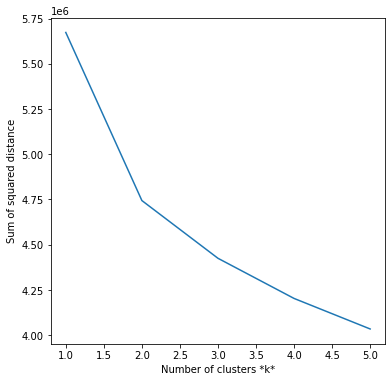

In [43]:
# check for best k ===k=4
sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [44]:
# Best number of clusters from the above graph = 3
cluster1=groups[0]
cluster2=groups[1]
cluster3=groups[2]


In [45]:
# test cluster list
print(cluster1)

['A5CK3ML55FAQJGOA.png', '4DLQL3KBMNJ39D3G.png', '3C1E8T8ALF0N170J.png', '6Q2PQQJ3QTIAHKA4.png', 'SR84DFHIECLQ4OCJ.png', '9TARD655P68KP26K.png', 'TSA3B8MOIF1FRNOI.png', '51I3191OPO2DK6K2.png', 'EEHPG8DIR68HHE9I.png', '52MO1KA5MJEK9F4F.png', 'CRR1C6D1MHIHQHMI.png', '774QTP6FGEHRJJ7I.png', 'CRI6JG234O2RFDOJ.png', '2CFRRE47ANN71JM6.png', 'LL2274P1MTBKSOPC.png', '4OESSDPKH5KCD1SD.png', 'TE6E33SQC9H7H8L7.png', 'ESKOCRG9H9PAMGL3.png', 'KTM4F86E7TF8L89L.png', 'GLOA2NKQ10385OCR.png', 'APKSBP9029CNHAM3.png', 'NJN5PG20NK91BKG2.png', 'ED6KIARC63JST93F.png', '67CIR4IM30NNSATD.png', 'MA5G19AF05IP4KE4.png', 'L09NQ0PD20MIK27O.png', 'PEFEK47P0PLH5I22.png', '4T9GKG02HPMISRAG.png', 'CMB22MI1F6K42TSA.png', 'HRDP5DHTC76KF7RQ.png', 'MMI9DQIR249QGOMJ.png', '6EBKQNPKSLERSTIS.png', '0GC2A6H6I3C5H2GE.png', 'JJJOLPK58H9I67ER.png', 'MJO61H183IBQ0MFB.png', 'NCJO7D406J4T8O64.png', '1JHSRR2EH77DQO30.png', 'T823LNGDHMO9FI4S.png', 'K2NR2AAFM761N09H.png', 'D64P4A8JH07FGDG2.png', 'E01P11CQS6L0MFLG.png', 'OSDLOOT59PGS42

In [46]:
# add new column cluster_image
df_train['cluster_image']=3
df_train.loc[df_train['Profile Image'].isin(cluster1), 'cluster_image'] = 1
df_train.loc[df_train['Profile Image'].isin(cluster2), 'cluster_image'] = 2


In [47]:
df_train.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815,3
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242,3
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559,1
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342,1
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078,3


## SAVE TEST FILE <df_train_img_canny.cvs> 

In [48]:
#save file
df_train.to_csv("/content/df_train_img_canny.csv", sep=',' ,index=False)

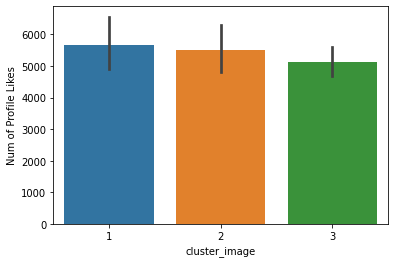

In [49]:
# Relation of Profile Category with Num of Profile Likes
sns.barplot(x=df_train['cluster_image'], y=df_train['Num of Profile Likes']);

## Test Data Set

In [50]:
df_test_images = df_test['Profile Image']
df_test_images

0       49I3SOKLI2CMNGP4.png
1       727IRIR59A3P88LK.png
2       LN95SD15SRPCEE8F.png
3       TB11I7F0PN033D4T.png
4       32PSGCK5PATHMR07.png
                ...         
2495    7SDJE48EFRPPNEJK.png
2496    PRT8RDNG6E86518P.png
2497    SRNIBIK27BQ2M3PB.png
2498    6CP232J9R8N84702.png
2499    AROR24MH3M79EHBS.png
Name: Profile Image, Length: 2500, dtype: object

In [51]:
!mkdir /content/modified_images_expanded_test

## EXPAND / RESIZE IMAGES FROM TEST DATASET

In [52]:
# Resize Images from the Test Dataset

%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os

for img_name in df_test_images:
    img_path = os.path.join('/content/test_profile_images/profile_images_test', img_name)
    img = cv2.imread(img_path)
    img_expanded = cv2.resize(img, None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    img_path_modified = os.path.join('/content/modified_images_expanded_test', img_name)
    cv2.imwrite(img_path_modified, img_expanded);  

## APPLY CANNY FILTER TO EXPANDED TEST IMAGES EXPANDED 

In [53]:
import os

!mkdir /content/modified_images_canny_test/

for img_name in df_test_images:
    #img_name_modified = 'sobel_' + img_name 
    #img_path = os.path.join('/content/train_profile_images/profile_images_train', img_name)
    img_path = os.path.join('/content/modified_images_expanded_test', img_name)
    img_modified = edgeDetector(img_path,algo_edgedetect='canny')
    img_path_modified = os.path.join('/content/modified_images_canny_test', img_name)
    cv2.imwrite(img_path_modified, img_modified);  

In [ ]:
# Display cany test images
for img_name in df_test_images:
    img_path = os.path.join('/content/modified_images_expanded_test', img_name)
    img = cv2.imread(img_path)
    img_path_modified = os.path.join('/content/modified_images_canny_test', img_name)
    img_exp = cv2.imread(img_path_modified)
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_exp),plt.title('Output',color='c')
    plt.show()

## EXTRACT FEATURES OF RESIZED AND CANNY EDGE IMAGES FROM TEST DATA SET

In [54]:
path_test= "/content/modified_images_canny_test"
# change the working directory to the path where the images are located
os.chdir(path_test)

# this list holds all the image filename
faces_test = []

# creates a ScandirIterator aliased as files
with os.scandir(path_test) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            faces_test.append(file.name)

In [55]:
data_test = {}
p_test="/content/modified_images_canny_test/face_features.pkl"
# lop through each image in the dataset
for face in faces_test:
    # try to extract the features and update the dictionary
    try:
        feat_test = extract_features(face,model)
        data_test[face] = feat_test
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p_test,'wb') as file:
            pickle.dump(data_test,file)

In [56]:
# get a list of the filenames
filenames_test = np.array(list(data_test.keys()))

# get a list of just the features
feat_test = np.array(list(data_test.values()))
feat_test.shape

(2500, 1, 4096)

In [57]:
# reshape so that there are 2500 samples of 4096 vectors
feat_test = feat_test.reshape(-1,4096)
feat_test.shape


(2500, 4096)

## PCA

In [58]:
#PCA
pca_test = PCA(n_components=100, random_state=22)
pca_test.fit(feat_test)
x_test = pca_test.transform(feat_test)

In [59]:
print(f"Components before PCA: {feat_test.shape[1]}")
print(f"Components after PCA: {pca_test.n_components}")

Components before PCA: 4096
Components after PCA: 100


## KMEANS

In [61]:
#kmeans
kmeans_test = KMeans(n_clusters=4,n_jobs=-1, random_state=22)
kmeans_test.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [62]:
# holds the cluster id and the images { id: [images] }
groups_test = {}
for file, cluster in zip(filenames_test,kmeans_test.labels_):
    if cluster not in groups_test.keys():
        groups_test[cluster] = []
        groups_test[cluster].append(file)
    else:
        groups_test[cluster].append(file)

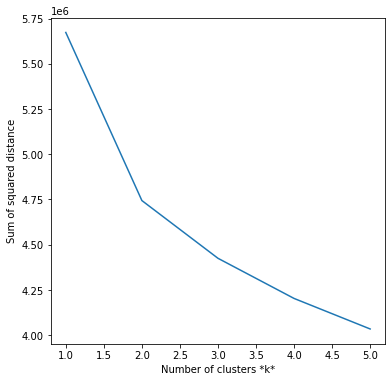

In [63]:
# check for best k ===k=3
sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [64]:
cluster1_test=groups_test[0]
cluster2_test=groups_test[1]
cluster3_test=groups_test[2]

In [65]:
# add new column cluster_image
df_test['cluster_image']=3
df_test.loc[df_test['Profile Image'].isin(cluster1_test), 'cluster_image'] = 1
df_test.loc[df_test['Profile Image'].isin(cluster2_test), 'cluster_image'] = 2

In [66]:
df_test.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,cluster_image
0,49I3SOKLI2CMNGP4,_FwKTE4dm,NaN,Set,Not verified,fa0a86,fc37c4,0a0101,False,-18000.0,"200 E Broadway, Suite 3D, New York NY 10002",Enabled,en,Mon Jul 20 21:05:24 +0000 2009,Quito,31528,2148,12926,469,business,13.827,3.4062,49I3SOKLI2CMNGP4.png,3
1,727IRIR59A3P88LK,tDMVTsvWbdpud,NaN,Not set,Not verified,ff0000,e6e6e6,001941,False,36000.0,"ÜT: -28.108029,153.410307",Enabled,en,Wed Aug 05 22:31:34 +0000 2009,Brisbane,42857,262,11678,1806,government,24.019,3.2656,727IRIR59A3P88LK.png,3
2,LN95SD15SRPCEE8F,k_TUXA297j,https://blob/5ljjaio2rp.com,Set,Verified,0d0101,000000,000000,False,-25200.0,@happyhippiefdn,Enabled,en,Fri Mar 18 18:36:02 +0000 2011,Pacific Time (US & Canada),40237847,392,9395,59247,unknown,26.011,12.1619,LN95SD15SRPCEE8F.png,3
3,TB11I7F0PN033D4T,HRDr8yt4s7M,NaN,Set,Verified,0000ff,e0ff92,9ae4e8,False,-25200.0,"Austin, TX",??,en,Sun Apr 08 05:45:46 +0000 2007,Pacific Time (US & Canada),230166,702,10507,2695,celebrity,26.127,2.1131,TB11I7F0PN033D4T.png,3
4,32PSGCK5PATHMR07,PXOI0egSsDqrve,https://blob/t3hjJ0c/Mo.com,Set,Not verified,992f09,ddeef6,ffffff,False,NaN,"New Rochelle, NY",Enabled,en,Mon Jun 04 19:51:04 +0000 2012,NaN,1199,1701,1022,8,unknown,17.878,3.9660,32PSGCK5PATHMR07.png,2


## SAVE TEST FILE <df_test_img_canny.cvs> 

In [68]:
#save file
df_test.to_csv("/content/df_test_img_canny.csv", sep=',' ,index=False)

[1] [DeepFace Project](https://pypi.org/project/deepface/)

[2] [How to cluster images based on visual similarity](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34)

[3] Hassan M., 2018, VGG16 Convolutional Network for Classification and Detection, Popular Networks. Accessed: Dec 2020. Source:  https://neurohive.io/en/popular-networks/vgg16/ 

[4] Serengil S.I., 2018, Deep Face Recognition with Keras, Accessed: Dec 2020. Source:  https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

[5] Simonyan, K. and Zisserman, A., 2014. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.

[6] Zhang, X., Zou, J., He, K. and Sun, J., 2015. Accelerating very deep convolutional networks for classification and detection. IEEE transactions on pattern analysis and machine intelligence, 38(10), pp.1943-1955



